# Building direct NCCF Simulation

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import scipy
from scipy import fft
from numpy import matlib
from tqdm import tqdm
from NI_simulation.modules import ni_sim

%load_ext autoreload
%autoreload 2

### Animate Sensitivity Kernel

In [217]:
taus = list(np.linspace(-2.5, 2.5, 200))

for k, tau in enumerate(tqdm(taus)):

    t_idx = np.argmin(np.abs(env.tau - tau))

    plt.figure(figsize=(9.8,8))
    im = plt.tricontourf(sources.X, sources.Y, R[:,t_idx], 256, cmap='plasma', vmin=0, vmax=np.max(R))
    plt.title(f'$f_c$ = {fc} Hz; $\\tau$ = {env.tau[t_idx]:0.3} s')
    plt.colorbar(ticks=np.linspace(0,np.max(R),10))
    
    plt.savefig(f'animation/{k:04}.png', dpi=200)
    plt.close()

100%|█████████████████████████████████████████| 200/200 [02:06<00:00,  1.59it/s]


## Experiment with directivity

In [2]:
# create sources
theta = 180
x = 10000*np.cos(np.deg2rad(theta))
y = 10000*np.sin(np.deg2rad(theta))

sources = ni_sim.source_distribution2D().distant_uniform(3500, 20000, 20000, label='gauss')

In [3]:
env = ni_sim.environment(sources, time_length=30, Fs = 2000)

(-20000.0, 20000.0)

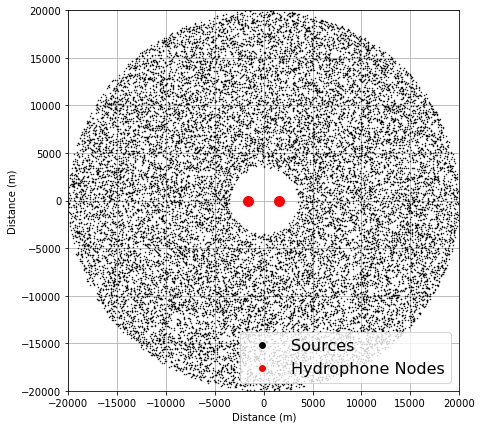

In [4]:
env.plot_env()
plt.xlim([-20000,20000])
plt.ylim([-20000,20000])

In [37]:
fc = 100
R100 = env.directly_sim_NCCF(fc, correlation_type='single')

fc = 10
R10 = env.directly_sim_NCCF(fc, correlation_type='single')

fc = 1
R1 = env.directly_sim_NCCF(fc, correlation_type='single')

100%|███████████████████████████████████| 20000/20000 [00:11<00:00, 1776.34it/s]


/var/folders/k2/r1_cwxg55s5_hbhq5rvmxdjc8b059l/T/ipykernel_34898/2179230008.py:4: RuntimeWarning: divide by zero encountered in log10
  ax.plot(bearing, 10*np.log10(R100/np.max(R100)), 'k', label='100 Hz')
/var/folders/k2/r1_cwxg55s5_hbhq5rvmxdjc8b059l/T/ipykernel_34898/2179230008.py:5: RuntimeWarning: divide by zero encountered in log10
  ax.plot(-bearing, 10*np.log10(R100/np.max(R100)), 'k')
/var/folders/k2/r1_cwxg55s5_hbhq5rvmxdjc8b059l/T/ipykernel_34898/2179230008.py:7: RuntimeWarning: divide by zero encountered in log10
  ax.plot(bearing, 10*np.log10(R10/np.max(R10)), 'k--', label='10 Hz')
/var/folders/k2/r1_cwxg55s5_hbhq5rvmxdjc8b059l/T/ipykernel_34898/2179230008.py:8: RuntimeWarning: divide by zero encountered in log10
  ax.plot(-bearing, 10*np.log10(R10/np.max(R10)), 'k--')
/var/folders/k2/r1_cwxg55s5_hbhq5rvmxdjc8b059l/T/ipykernel_34898/2179230008.py:10: RuntimeWarning: divide by zero encountered in log10
  ax.plot(bearing, 10*np.log10(R1/np.max(R1)), 'k:', label='1Hz')
/var/f

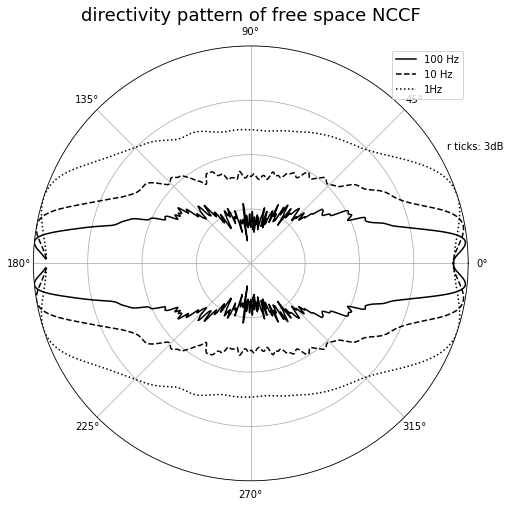

In [45]:
bearing = np.arccos(env.c*env.tau/3186)

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='polar')

ax.plot(bearing, 10*np.log10(R100/np.max(R100)), 'k', label='100 Hz')
ax.plot(-bearing, 10*np.log10(R100/np.max(R100)), 'k')

ax.plot(bearing, 10*np.log10(R10/np.max(R10)), 'k--', label='10 Hz')
ax.plot(-bearing, 10*np.log10(R10/np.max(R10)), 'k--')

ax.plot(bearing, 10*np.log10(R1/np.max(R1)), 'k:', label='1Hz')
ax.plot(-bearing, 10*np.log10(R1/np.max(R1)), 'k:')

ax.set_yticklabels([])
ax.set_yticks([0, -3, -6, -9, -12])
ax.set_theta_zero_location('E')
plt.legend()
plt.text(np.deg2rad(30),0.5,'r ticks: 3dB')
plt.title('directivity pattern of free space NCCF', fontsize=18)
plt.savefig('directivity_pattern.png',dpi=200)

Text(0, 0.5, 'amplitude')

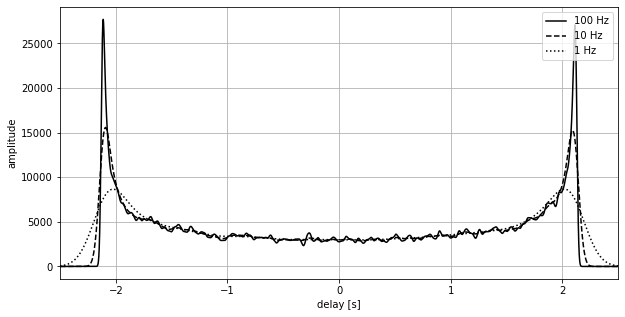

In [71]:
plt.figure(figsize=(10,5))
plt.plot(env.tau, R100, 'k-', label='100 Hz')
plt.plot(env.tau, R10, 'k--', label='10 Hz')
plt.plot(env.tau, R1, 'k:', label='1 Hz')
plt.legend(loc='upper right')
plt.xlim([-2.5, 2.5])

plt.grid()
plt.xlabel('delay [s]')
plt.ylabel('amplitude')

## Play around with theoretical TDGF

In [56]:
fc = 100
a = -np.pi**2*fc/np.log(1/np.sqrt(2))
TDGF100 = np.sqrt(a/np.pi)*np.exp(-a*(env.tau-3186/env.c)**2) + np.sqrt(a/np.pi)*np.exp(-a*(env.tau+3186/env.c)**2)

fc = 10
a = -np.pi**2*fc/np.log(1/np.sqrt(2))
TDGF10 = np.sqrt(a/np.pi)*np.exp(-a*(env.tau-3186/env.c)**2) + np.sqrt(a/np.pi)*np.exp(-a*(env.tau+3186/env.c)**2)

fc = 1
a = -np.pi**2*fc/np.log(1/np.sqrt(2))
TDGF1 = np.sqrt(a/np.pi)*np.exp(-a*(env.tau-3186/env.c)**2) + np.sqrt(a/np.pi)*np.exp(-a*(env.tau+3186/env.c)**2)

Text(0, 0.5, 'amplitude')

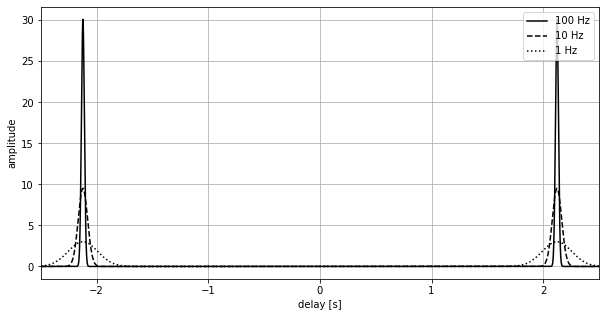

In [73]:
plt.figure(figsize=(10,5))
plt.plot(env.tau, TDGF100, 'k-', label='100 Hz')
plt.plot(env.tau, TDGF10, 'k--', label='10 Hz')
plt.plot(env.tau, TDGF1, 'k:', label='1 Hz')
plt.legend(loc='upper right')
plt.xlim([-2.5, 2.5])

plt.grid()
plt.xlabel('delay [s]')
plt.ylabel('amplitude')

/var/folders/k2/r1_cwxg55s5_hbhq5rvmxdjc8b059l/T/ipykernel_34898/915314188.py:1: RuntimeWarning: invalid value encountered in arccos
  bearing = np.arccos(env.c*env.tau/3186)
/var/folders/k2/r1_cwxg55s5_hbhq5rvmxdjc8b059l/T/ipykernel_34898/915314188.py:6: RuntimeWarning: divide by zero encountered in log10
  ax.plot(bearing, 10*np.log10(TDGF100/np.max(TDGF100)), 'k', label='100 Hz')
/var/folders/k2/r1_cwxg55s5_hbhq5rvmxdjc8b059l/T/ipykernel_34898/915314188.py:7: RuntimeWarning: divide by zero encountered in log10
  ax.plot(-bearing, 10*np.log10(TDGF100/np.max(TDGF100)), 'k')
/var/folders/k2/r1_cwxg55s5_hbhq5rvmxdjc8b059l/T/ipykernel_34898/915314188.py:9: RuntimeWarning: divide by zero encountered in log10
  ax.plot(bearing, 10*np.log10(TDGF10/np.max(TDGF10)), 'k--', label='10 Hz')
/var/folders/k2/r1_cwxg55s5_hbhq5rvmxdjc8b059l/T/ipykernel_34898/915314188.py:10: RuntimeWarning: divide by zero encountered in log10
  ax.plot(-bearing, 10*np.log10(TDGF10/np.max(TDGF10)), 'k--')
/var/folder

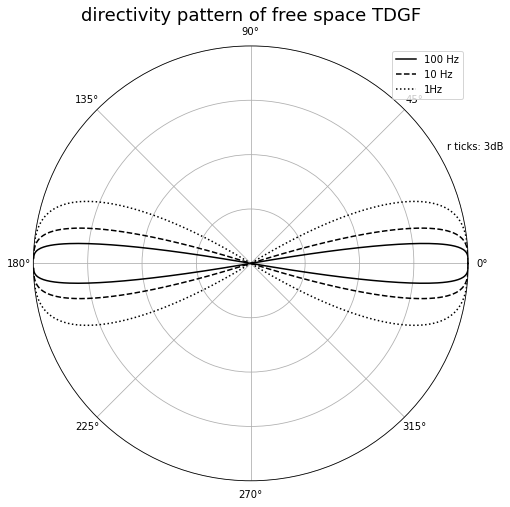

In [66]:
bearing = np.arccos(env.c*env.tau/3186)

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='polar')

ax.plot(bearing, 10*np.log10(TDGF100/np.max(TDGF100)), 'k', label='100 Hz')
ax.plot(-bearing, 10*np.log10(TDGF100/np.max(TDGF100)), 'k')

ax.plot(bearing, 10*np.log10(TDGF10/np.max(TDGF10)), 'k--', label='10 Hz')
ax.plot(-bearing, 10*np.log10(TDGF10/np.max(TDGF10)), 'k--')

ax.plot(bearing, 10*np.log10(TDGF1/np.max(TDGF1)), 'k:', label='1Hz')
ax.plot(-bearing, 10*np.log10(TDGF1/np.max(TDGF1)), 'k:')

ax.set_yticklabels([])
ax.set_yticks([0, -3, -6, -9, -12])
ax.set_rlim([-12, 0])
ax.set_theta_zero_location('E')
plt.legend()
plt.text(np.deg2rad(30),0.5,'r ticks: 3dB')
plt.title('directivity pattern of free space TDGF', fontsize=18)
plt.savefig('directivity_pattern_TDGF.png',dpi=200)

## Play around with correlation coefficent

(<Figure size 504x504 with 1 Axes>,
 <AxesSubplot:xlabel='Distance (m)', ylabel='Distance (m)'>)

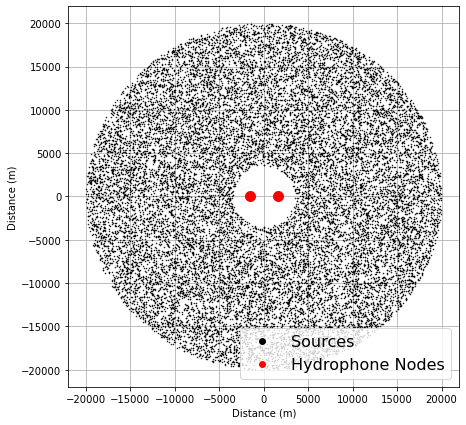

In [75]:
env.plot_env()

In [78]:
fc = 10
R = env.R100 = env.directly_sim_NCCF(fc, correlation_type='all')

100%|████████████████████████████████████| 20000/20000 [00:20<00:00, 952.82it/s]


100%|████████████████████████████████████| 20000/20000 [00:31<00:00, 644.50it/s]


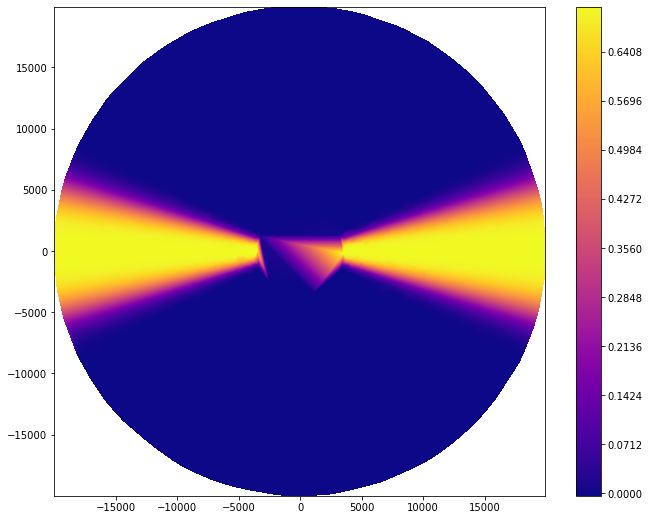

In [82]:
rhos = ni_sim.calc_corr_coef(R, TDGF10, plot=True, sources=env.sources)

100%|████████████████████████████████████| 20000/20000 [00:28<00:00, 699.49it/s]


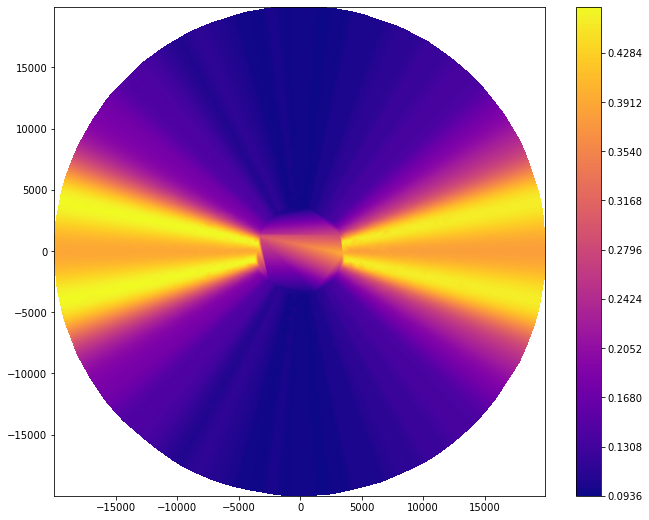

In [83]:
rhos_r = ni_sim.calc_corr_coef(R, np.mean(R, axis=0), plot=True, sources=env.sources)

## Old Stuff

100%|████████████████████████████████████| 20000/20000 [00:28<00:00, 707.65it/s]


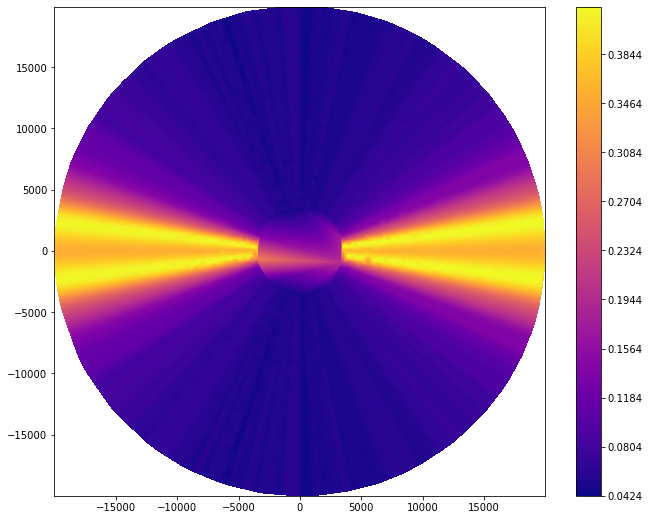

In [97]:
rhos = ni_sim.calc_corr_coef(R, plot=True, sources=env.sources)

/var/folders/k2/r1_cwxg55s5_hbhq5rvmxdjc8b059l/T/ipykernel_34625/3693343958.py:1: RuntimeWarning: divide by zero encountered in log10
  plt.polar(bearing, 20*np.log10(np.mean(R, axis=0)), 'k')
/var/folders/k2/r1_cwxg55s5_hbhq5rvmxdjc8b059l/T/ipykernel_34625/3693343958.py:2: RuntimeWarning: divide by zero encountered in log10
  plt.polar(-bearing, 20*np.log10(np.mean(R, axis=0)), 'k')


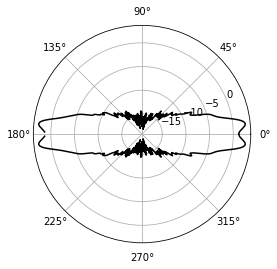

In [98]:
plt.polar(bearing, 20*np.log10(np.mean(R, axis=0)), 'k')
plt.polar(-bearing, 20*np.log10(np.mean(R, axis=0)), 'k')

In [8]:
theta, directivity = ni_sim.calc_directivity(sources.X, sources.Y, R, 10000)

calculating correlation coefficents...


100%|███████████████████████████████████| 10000/10000 [00:01<00:00, 8405.13it/s]


calculating surface interpolation...


/Users/jhrag/opt/anaconda3/envs/ooi_dev9/lib/python3.9/site-packages/scipy/interpolate/_fitpack_impl.py:977: RuntimeWarning: A theoretically impossible result when finding a smoothing spline
with fp = s. Probable causes: s too small or badly chosen eps.
(abs(fp-s)/s>0.001)
	kx,ky=3,3 nx,ny=56,58 m=10000 fp=42.578469 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))


In [50]:
R_total = np.sum(R, axis=0)

In [51]:
bearing = np.arccos(env.c*env.tau/3186)
mask = np.isnan(bearing)
bearing = bearing[~mask]

/var/folders/k2/r1_cwxg55s5_hbhq5rvmxdjc8b059l/T/ipykernel_19629/71096768.py:1: RuntimeWarning: invalid value encountered in arccos
  bearing = np.arccos(env.c*env.tau/3186)


In [95]:
plt.plot(bearing, R_total[~mask])

NameError: name 'R_total' is not defined

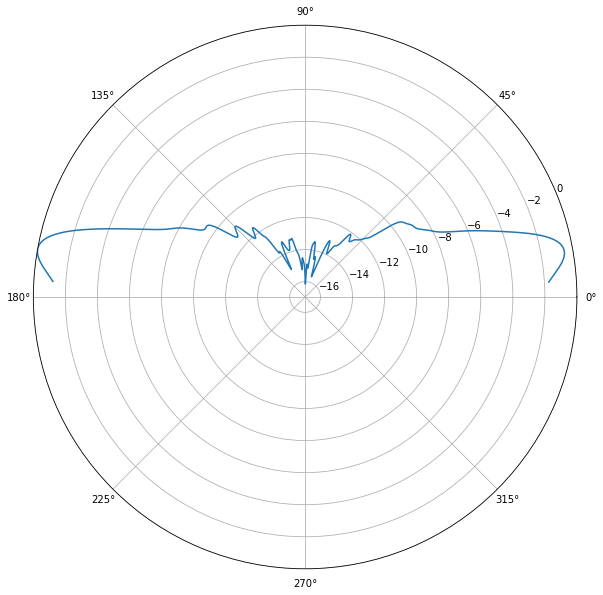

In [53]:
plt.figure(figsize=(10,10))
plt.polar(bearing, 20*np.log10(R_total[~mask]/np.max(R_total)))